In [59]:
library(fpp2)
library(gridExtra)

In [60]:
# 4. 확률 과정 Z_t = 1 + 0.9 * Z_(t - 1) + ε_t (t = 1, 2, ..., 100) 으로부터 시계열자료를 생성한 후 다음을 수행하라. 단,
# Z_0 = 10의 값을 주고 오차항 ε_t은 WN (white noise) N(0,1)이라고 가정한다. 

z <- ts(numeric(100))
z[1] = 10

e <- rnorm(100)
for(t in 2:100){
    z[t] <- 1 + 0.9 * z[t - 1] + e[t]
}

print(z)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1] 10.000000 10.848292 12.454850 11.902676 10.785166 11.320701 11.480487
  [8] 11.058314 11.349604 11.321013 13.252539 12.761140 12.052950 10.603061
 [15]  9.250857 11.515140 13.288504 12.789862 13.850947 13.765731 14.047735
 [22] 13.052554 15.599098 15.093690 12.675600 11.566389 12.072074 12.583714
 [29] 11.538737  9.383848  7.660292  9.444910  7.482410  7.810337  7.884894
 [36]  7.863705  7.004723  7.428867  8.473311  8.551662 10.099547 11.058870
 [43] 10.767913 11.593719 11.491677 12.443996 11.939644 12.734224 12.557029
 [50] 13.268196 13.714422 12.168274  9.745774  8.090453 10.863316 10.942489
 [57] 11.879569 12.107859 11.530485 11.559277 10.046976  9.952429  8.373490
 [64]  7.685545  8.144451  9.576728 11.591813 12.130272 11.094678 11.196687
 [71] 10.917438 10.526535 11.257021 11.252206 10.510248  9.965344  9.493956
 [78]  7.766184  7.793541  7.544850  6.728062  6.374068  5.726769  6.228216
 [85]  7.449422  7.964615  8.535618  8

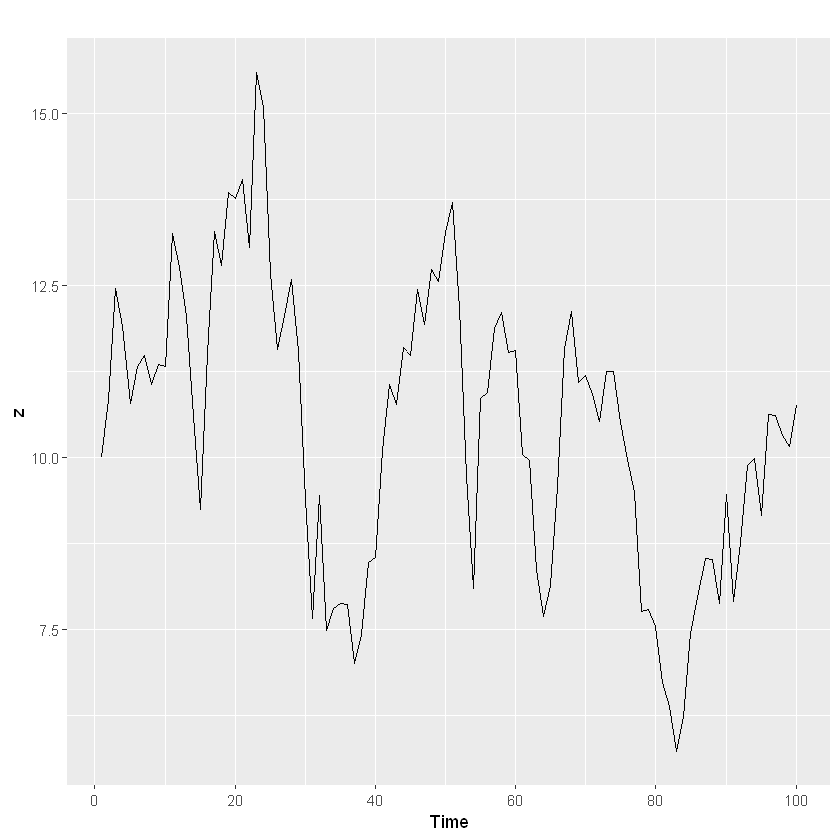

In [94]:
# (a) {Z_t}의 시계열그림을 그려라

autoplot(z)

In [62]:
# (b) {Z_t}에 대한 표본상관계수(ACF) ρ_k, (k = 0,1, … ,10)를 구하라. 

Acf(z, lag.max = 10, type=c("correlation"), plot = F)


Autocorrelations of series 'z', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.866  0.718  0.600  0.507  0.416  0.327  0.242  0.141  0.062 -0.015 

In [63]:
# (c) {Z_t}에 대한 부분표본상관계수(PACF)를 구하라.
Acf(z, lag.max = 10, type=c("partial"), plot = F)

Pacf(z, lag.max = 10, plot = F)


Partial autocorrelations of series 'z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.866 -0.123  0.032  0.018 -0.058 -0.042 -0.045 -0.131  0.009 -0.084 


Partial autocorrelations of series 'z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.866 -0.123  0.032  0.018 -0.058 -0.042 -0.045 -0.131  0.009 -0.084 

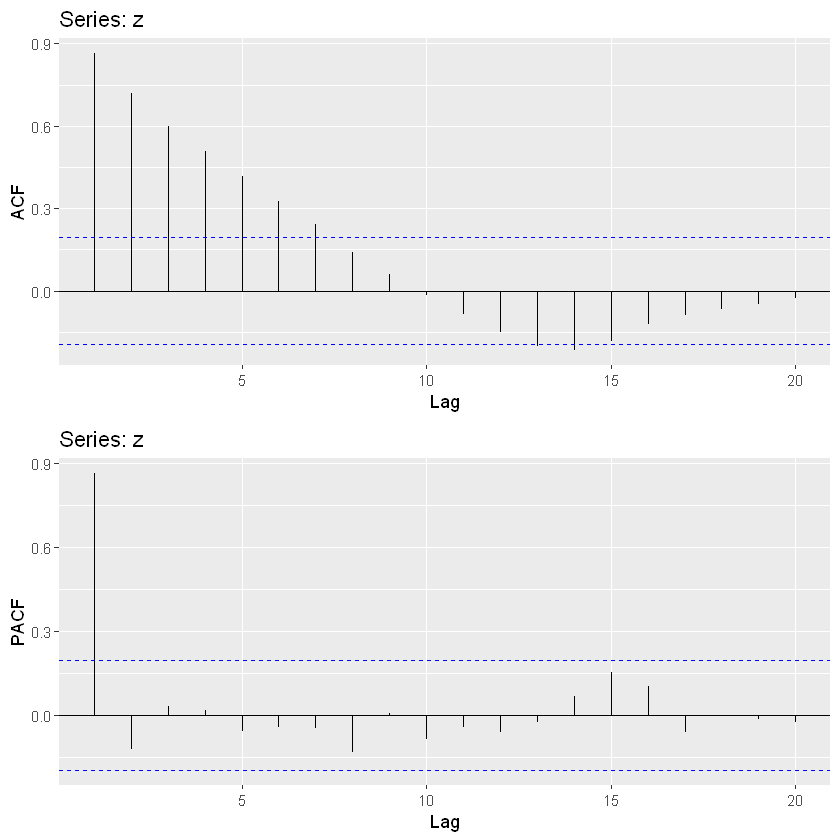

In [64]:
p1 <- ggAcf(z, type = c("correlation"))
p2 <- ggPacf(z)
grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2)))


Call:
lm(formula = n_z1 ~ n_z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19677 -0.62471 -0.04328  0.70449  2.89098 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.40774    0.54024   2.606   0.0106 *  
n_z          0.86576    0.05079  17.044   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.053 on 97 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7471 
F-statistic: 290.5 on 1 and 97 DF,  p-value: < 2.2e-16



ρ1 :  0.86554

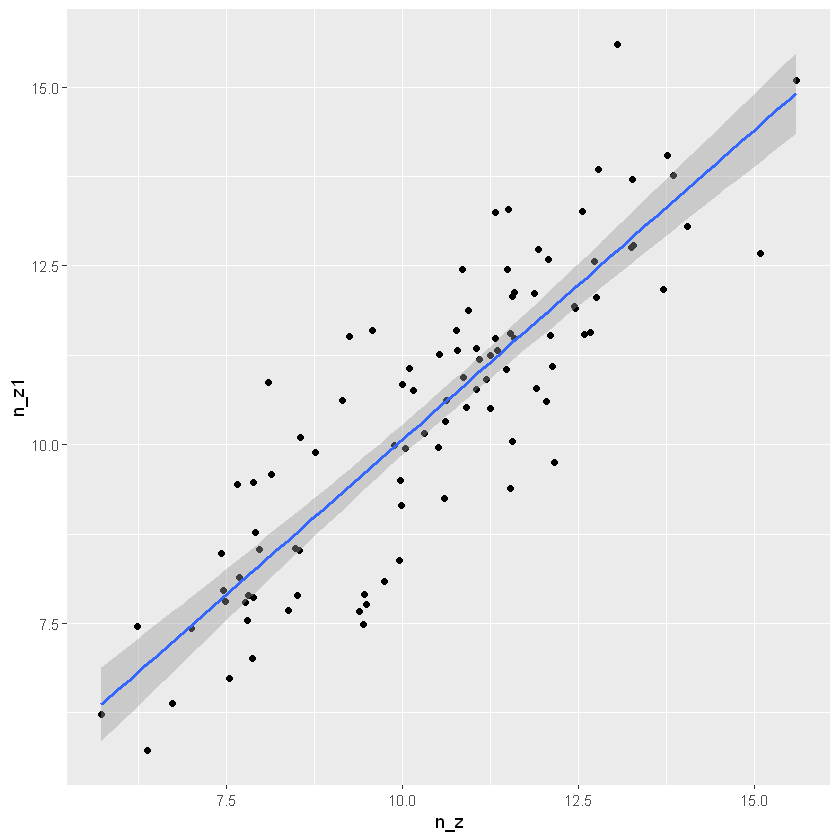

In [125]:
# (d) Z_t, Z_(t - 1) 의 산점도를 그리고, 이 산점도와 ρ1의 관계를 설명하라.

z1 <- ts(numeric(99))
for(t in 2:100){
    z1[t - 1] <- z[t]
}

n_z = z[1:99]
n_z1 = as.numeric(z1)
df_z <- data.frame(n_z, n_z1)

ggplot(df_z, aes(n_z, n_z1)) + 
    geom_point() +
    stat_smooth(method = lm, level = 0.95)

summary(lm(n_z1 ~ n_z))

cat("\nρ1 : ", round(corr$acf[2], 5))

In [127]:
# (e) Z_t, Z_(t - 2) 의 산점도를 그리고, 이 산점도와 ρ2의 관계를 설명하라.

z2 <- ts(numeric(98))
for(t in 3:100){
    z2[t - 2] <- z[t]
}

n_z = z[1:98]
n_z2 = as.numeric(z2)
df_z <- data.frame(n_z, n_z2)

summary(lm(n_z2 ~ n_z))

cat("\nρ1 : ", round(corr$acf[3], 5))


Call:
lm(formula = n_z2 ~ n_z)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5903 -0.9893  0.0420  1.0660  3.7046 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.93498    0.75475   3.889 0.000186 ***
n_z          0.71873    0.07093  10.133  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.471 on 96 degrees of freedom
Multiple R-squared:  0.5168,	Adjusted R-squared:  0.5118 
F-statistic: 102.7 on 1 and 96 DF,  p-value: < 2.2e-16



ρ1 :  0.71843


ρ1 :  0.8655385
ρ2 :  0.7184279

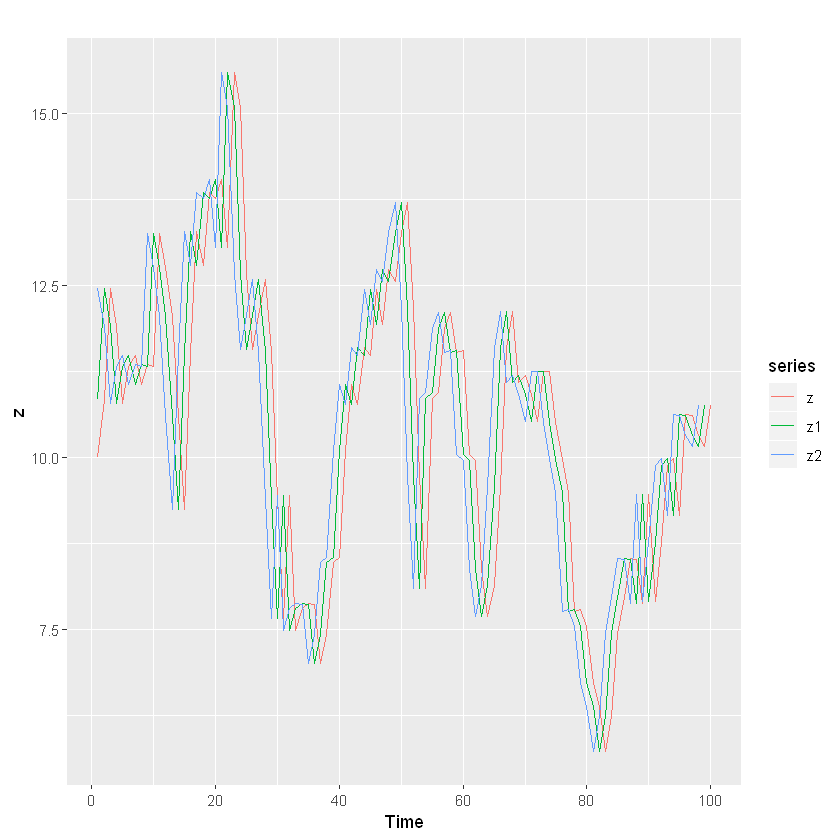

In [126]:
corr <- Acf(z, lag.max = 10, type=c("correlation"), plot = F)
cat("\nρ1 : ", corr$acf[2])
cat("\nρ2 : ", corr$acf[3])

autoplot(z, series = 'z') + autolayer(z1) + autolayer(z2)